<a href="https://colab.research.google.com/github/jarrodsb/DSPS_JBieber/blob/main/HW10/kerasmnist_mlp_Bieber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHYS 461 Homework 10 - Jarrod Bieber

**Finish the notebook started in class (kerasmnist.ipynb in the Labs folder) by changing the neural network we built together into a convolutional neural network (see also slides)**

---

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt

# For Convolution Neural Network
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input # Import Input layer

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [4]:
x_train = x_train.astype(float) / 255.
#y_train = y_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.
#y_test = y_test.astype(float) / 255.

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

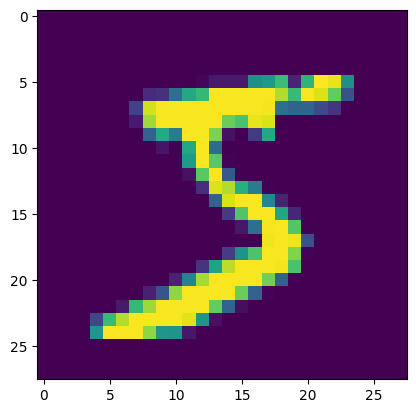

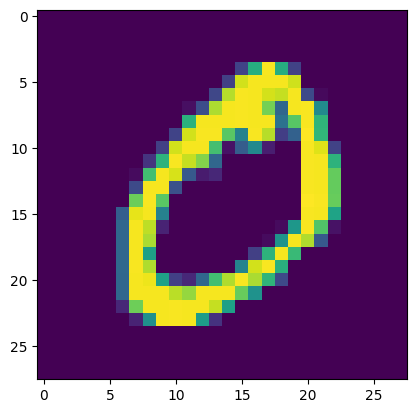

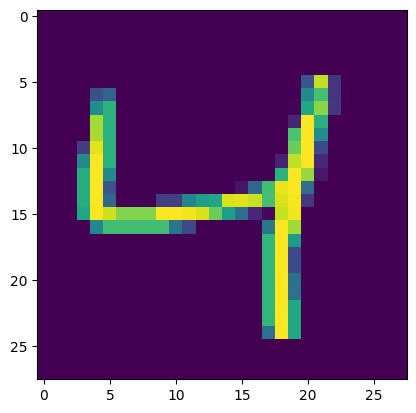

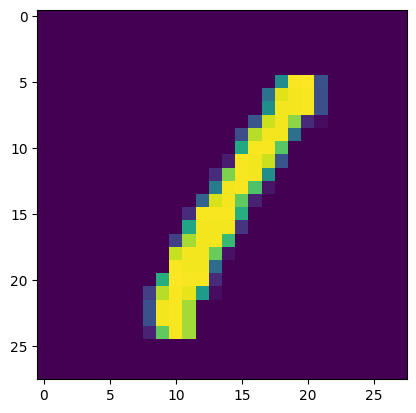

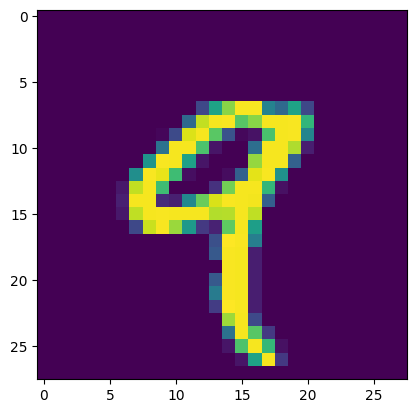

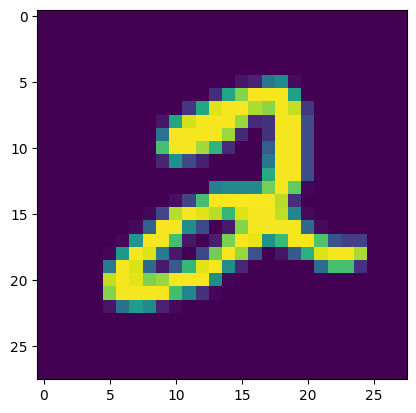

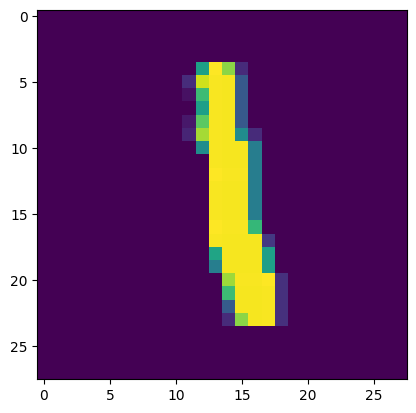

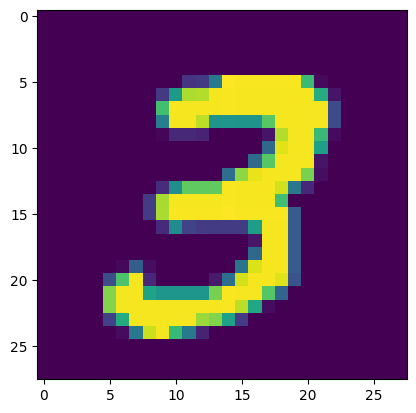

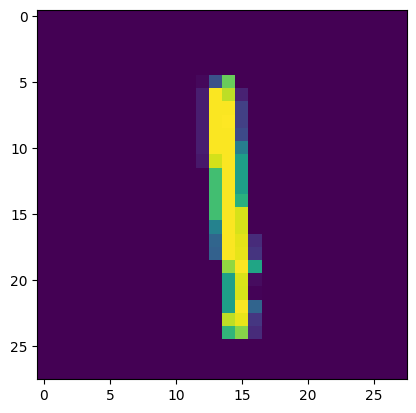

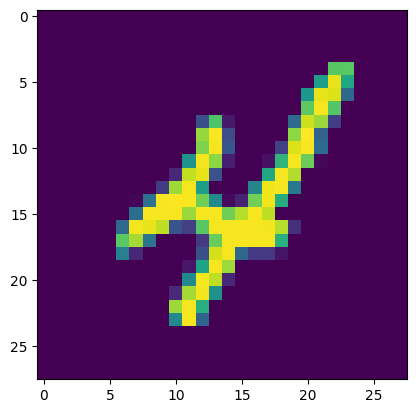

In [8]:
for i in range (10):
  plt.imshow(x_train[i])
  plt.show()

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])

In [12]:
x_trainraveled.shape

(60000, 784)

In [13]:
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [14]:
x_testraveled.shape

(10000, 784)

In [15]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [16]:
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [17]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4395 - loss: 1.8859 - val_accuracy: 0.8834 - val_loss: 0.6846
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8996 - loss: 0.5569 - val_accuracy: 0.9273 - val_loss: 0.3271
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9351 - loss: 0.2899 - val_accuracy: 0.9448 - val_loss: 0.2230
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9511 - loss: 0.1982 - val_accuracy: 0.9533 - val_loss: 0.1796
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9626 - loss: 0.1512 - val_accuracy: 0.9605 - val_loss: 0.1548
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9714 - loss: 0.1158 - val_accuracy: 0.9637 - val_loss: 0.1344
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.0981 - val_accuracy: 0.9641 - val_loss: 0.1277
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9814 - loss: 0.0774 - val_accuracy: 0.

In [19]:
history.history

{'accuracy': [0.6588888764381409,
  0.909755527973175,
  0.9380000233650208,
  0.9527333378791809,
  0.9629111289978027,
  0.9706000089645386,
  0.9761777520179749,
  0.9804444313049316,
  0.9842666387557983,
  0.9872221946716309],
 'loss': [1.413100242614746,
  0.4653666317462921,
  0.26481518149375916,
  0.19004006683826447,
  0.1469375044107437,
  0.11668257415294647,
  0.09480757266283035,
  0.0787903293967247,
  0.0641663670539856,
  0.05298975110054016],
 'val_accuracy': [0.883400022983551,
  0.9272666573524475,
  0.9448000192642212,
  0.9532666802406311,
  0.9605333209037781,
  0.9637333154678345,
  0.9641333222389221,
  0.968999981880188,
  0.9696000218391418,
  0.9717333316802979],
 'val_loss': [0.684567928314209,
  0.3271256387233734,
  0.22302600741386414,
  0.17958910763263702,
  0.15477383136749268,
  0.13438527286052704,
  0.12774713337421417,
  0.11303792148828506,
  0.1101081594824791,
  0.10076138377189636]}

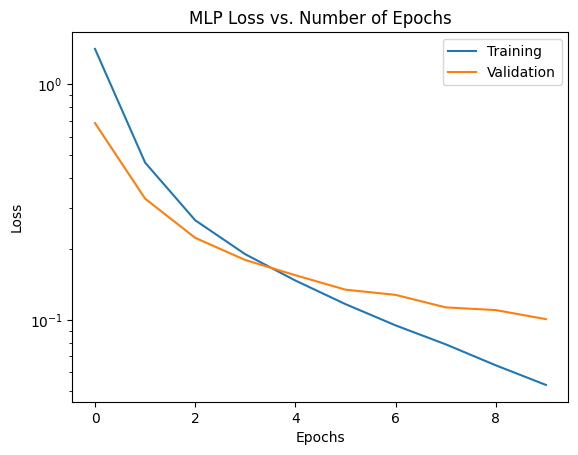

In [20]:
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label="Validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP Loss vs. Number of Epochs')
plt.legend()
plt.yscale('log')

**Figure 1:** A plot of the loss value measured by our Training and Validation data after being trained by a Multi-Layer Perceptron (MLP) model over a series of epochs (iterations). Our training data was a 2D-array representing flattened images displayed earlier in the notebook, with one-hot encoded labels applied to the data. 25% of the training data was set aside for validation, and the model was iterated up to 10 times. We see that the loss value decreases (improves) with each successive epoch, but after 3 epochs the Training data does better than the Validation data (overfitting).

In [21]:
mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9687 - loss: 0.1106


[0.09731416404247284, 0.972599983215332]

## Convolution Neural Network:

In [23]:
input_shape = (28, 28, 1) # Define input_shape

model = Sequential([
    Input(shape=input_shape), # Use Input layer as the first layer
    Conv2D(32, kernel_size=(10, 10), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
cnn_history = model.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7950 - loss: 0.6597 - val_accuracy: 0.9669 - val_loss: 0.1049
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9706 - loss: 0.0963 - val_accuracy: 0.9755 - val_loss: 0.0778
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9807 - loss: 0.0614 - val_accuracy: 0.9819 - val_loss: 0.0596
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9847 - loss: 0.0470 - val_accuracy: 0.9804 - val_loss: 0.0618
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9871 - loss: 0.0392 - val_accuracy: 0.9840 - val_loss: 0.0506
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9903 - loss: 0.0294 - val_accuracy: 0.9857 - val_loss: 0.0488
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9924 - loss: 0.0245 - val_accuracy: 0.9827 - val_loss: 0.0627
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9924 - loss: 0.0211 - val_accuracy: 0.

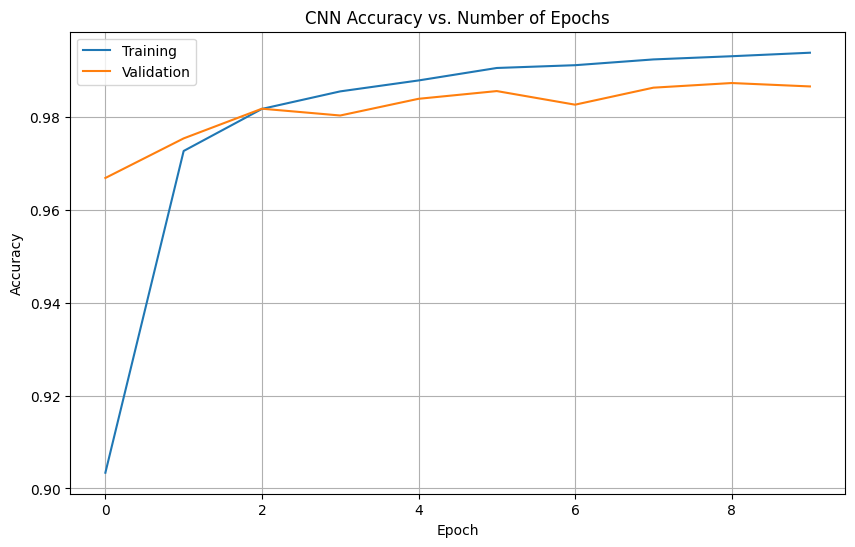

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['accuracy'], label='Training')
plt.plot(cnn_history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy vs. Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()

**Figure 2:** A plot of the accuracy value measured by our Training and Validation data after being trained by a Convolution Neural Network (CNN) model. It utilizes sequential convolution layers, ReLu normalization that replaces negative values with zeros, and Max-Pooling which reduces the image size and generalizes the result. As before, 25% of the training data was set aside for validation, and the model was iterated up to 10 times. We can see that see that a high level of accuracy is reached, but that after 2 epochs, a small amount of overfitting stars to occur.

## Convolution Neural Network with Dropout Parameter:

In [27]:
input_shape = (28, 28, 1) # Define input_shape


model_2 = Sequential([
    Input(shape=input_shape), # Use Input layer as the first layer
    Conv2D(32, kernel_size=(10, 10), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
cnn_history_2 = model_2.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7412 - loss: 0.7938 - val_accuracy: 0.9669 - val_loss: 0.1087
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9546 - loss: 0.1505 - val_accuracy: 0.9771 - val_loss: 0.0746
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9699 - loss: 0.0973 - val_accuracy: 0.9813 - val_loss: 0.0590
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9774 - loss: 0.0742 - val_accuracy: 0.9787 - val_loss: 0.0720
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9813 - loss: 0.0630 - val_accuracy: 0.9859 - val_loss: 0.0536
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9858 - loss: 0.0470 - val_accuracy: 0.9860 - val_loss: 0.0497
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9860 - loss: 0.0450 - val_accuracy: 0.9877 - val_loss: 0.0449
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9874 - loss: 0.0413 - val_accuracy: 0.

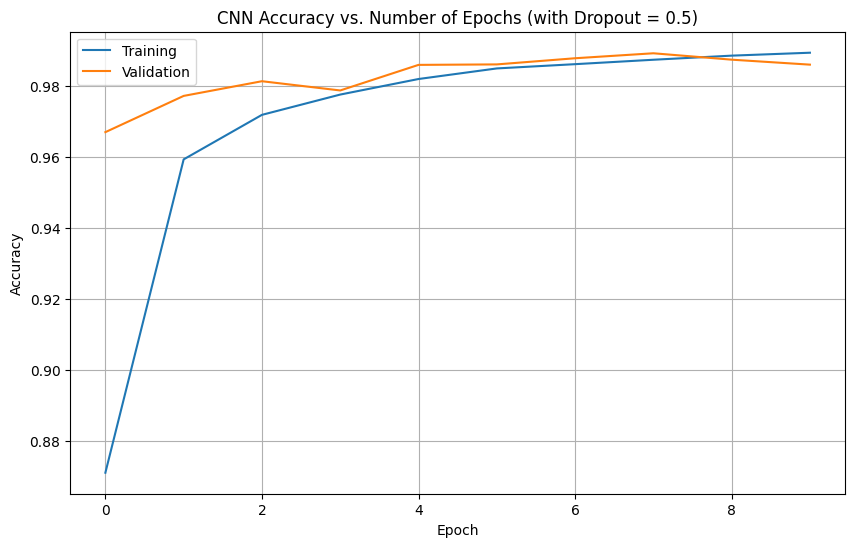

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(cnn_history_2.history['accuracy'], label='Training')
plt.plot(cnn_history_2.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy vs. Number of Epochs (with Dropout = 0.5)')
plt.legend()
plt.grid(True)
plt.show()

**Figure 3:** Another plot of the accuracy value measured by our Training and Validation data after being trained by a Convolution Neural Network (CNN) model. A 'Dropout' paramter value of 0.5 has been added. It is a regularization technique that randomly sets 50% of the input units to 0 at each update during training. This helps prevent overfitting, as can be seen in the plot, as compared with Figure 2.